In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [5]:
#Data reading and visaulizing tools
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline

#preprocessing tools
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, LabelBinarizer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.tree import export_text, plot_tree,export_graphviz

#Ensemble Models
#Bagging Classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Boosting Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier  #Extreme Gradient Boosting

#Artificial Neural Network tools
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#additional tools
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

from sklearn import set_config
set_config(display='diagram')


In [6]:
pd.options.display.max_columns= None
churn_df=pd.read_csv('/content/drive/MyDrive/Neural Network (DL)/wa_churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn_df.shape

(7043, 21)

In [8]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
churn_df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

This is a binary classisfication problem

In [79]:
churn_df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [11]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [30]:
X=churn_df.drop(['customerID','Churn','TotalCharges'], axis=1)
y=churn_df['Churn']

In [31]:
columns=[]
for column in X.columns:
    if X[column].dtype=='object':
        columns.append(column)
print(columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [33]:
# create the transformer
X=pd.get_dummies(X, drop_first=True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [34]:
lb=LabelBinarizer()
y_ohe=lb.fit_transform(y)

In [35]:
y_ohe

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.3, random_state=42)

In [37]:
#scale the data
scaler=StandardScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

In [38]:
X_train=pd.DataFrame(data=scaled_train, columns=X.columns)
X_test=pd.DataFrame(data=scaled_test, columns=X.columns)

In [39]:
X.shape

(7043, 29)

#Prepare the ANN model

In [43]:
model=Sequential()
model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=2,activation='softmax'))

#compile the model
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None,
              steps_per_execution=None,
              jit_compile=None)

ealy_stop=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=50,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [44]:
#fit the model
history=model.fit(X_train,y_train,batch_size=128,epochs=400,validation_data=(X_test,y_test),verbose=1,callbacks=[ealy_stop])

Epoch 1/400
39/39 [==============================] - 2s 9ms/step - loss: 0.7125 - accuracy: 0.5193 - val_loss: 0.6762 - val_accuracy: 0.7298
Epoch 2/400
39/39 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.7091 - val_loss: 0.6568 - val_accuracy: 0.7283
Epoch 3/400
39/39 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.7369 - val_loss: 0.6155 - val_accuracy: 0.7283
Epoch 4/400
39/39 [==============================] - 0s 5ms/step - loss: 0.5818 - accuracy: 0.7367 - val_loss: 0.5265 - val_accuracy: 0.7283
Epoch 5/400
39/39 [==============================] - 0s 4ms/step - loss: 0.5311 - accuracy: 0.7410 - val_loss: 0.4733 - val_accuracy: 0.7345
Epoch 6/400
39/39 [==============================] - 0s 4ms/step - loss: 0.5114 - accuracy: 0.7580 - val_loss: 0.4502 - val_accuracy: 0.7880
Epoch 7/400
39/39 [==============================] - 0s 5ms/step - loss: 0.4911 - accuracy: 0.7596 - val_loss: 0.4404 - val_accuracy: 0.7866
Epoch 8/400
3

In [45]:
result_df=pd.DataFrame(model.history.history)
result_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.712548,0.519270,0.676232,0.729768
1,0.670162,0.709128,0.656799,0.728348
2,0.638154,0.736917,0.615517,0.728348
3,0.581775,0.736714,0.526531,0.728348
4,0.531100,0.740974,0.473347,0.734501


In [46]:
losses=result_df.loc[:,['loss','val_loss']]
accuracyies=result_df.loc[:,['accuracy','val_accuracy']]

<AxesSubplot:>

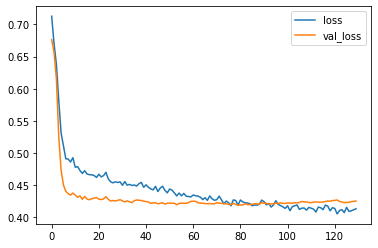

In [47]:
losses.plot()

In [48]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

67/67 [==============================] - 0s 1ms/step
[[1656  457]
 [   0    0]]


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      2113
           1       0.00      0.00      0.00         0

    accuracy                           0.78      2113
   macro avg       0.50      0.39      0.44      2113
weighted avg       1.00      0.78      0.88      2113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
